In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

In [2]:
df = pd.read_csv('nonvoters2_wrangled.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5836 entries, 0 to 5835
Columns: 119 entries, Unnamed: 0 to voter_category
dtypes: float64(23), int64(91), object(5)
memory usage: 5.3+ MB


In [4]:
df.head()

,Unnamed: 0,RespId,weight,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,...,Q30,Q31,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category
0,0,470001,0.7516,1,1,2,4,1,4,2,...,2,NaN,1.0,NaN,73,College,White,Female,$75-125k,always
1,1,470002,1.0267,1,2,2,3,1,1,2,...,3,NaN,NaN,1.0,90,College,White,Female,$125k or more,always
2,2,470003,1.0844,1,1,2,2,1,1,2,...,2,NaN,2.0,NaN,53,College,White,Male,$125k or more,sporadic
3,3,470007,0.6817,1,1,1,3,1,1,1,...,2,NaN,1.0,NaN,58,Some college,Black,Female,$40-75k,sporadic
4,4,480008,0.9910,1,1,-1,1,1,1,1,...,1,-1.0,NaN,NaN,81,High school or less,White,Male,$40-75k,always


In [5]:
df = df.drop(['Unnamed: 0', 'RespId', 'weight'], axis=1)
df.columns

Index(['Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_9',
       'Q2_10',
       ...
       'Q30', 'Q31', 'Q32', 'Q33', 'ppage', 'educ', 'race', 'gender',
       'income_cat', 'voter_category'],
      dtype='object', length=116)

In [6]:
y = df[['voter_category']]

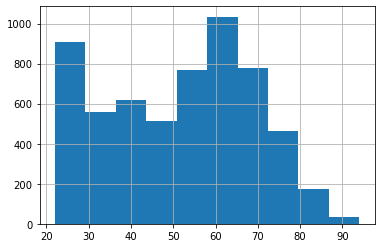

In [7]:
df.ppage.hist()
plt.show()


In [8]:
# Create age categories in df

df = df.astype({'ppage':'int64'})
for i in range(len(df['ppage'])):
    if df.loc[i,'ppage']>=18 and df.loc[i,'ppage']<=25:
        df.loc[i,'age']='18-25'
    elif df.loc[i,'ppage']<=35:
        df.loc[i,'age']='26-35'
    elif df.loc[i,'ppage']<=45:
        df.loc[i,'age']='36-45'
    elif df.loc[i,'ppage']<=55:
        df.loc[i,'age']='46-55'
    elif df.loc[i,'ppage']<=65:
        df.loc[i,'age']='56-65'
    else:
        df.loc[i,'age']='66+'
df = df.drop(['ppage'],axis=1).astype(object)

In [9]:
df_dum = pd.get_dummies(df, drop_first=True)
#df_dum = df_dum.join(y)

In [10]:
df_dum.head()

,Q2_1_1,Q2_1_2,Q2_1_3,Q2_1_4,Q2_2_1,Q2_2_2,Q2_2_3,Q2_2_4,Q2_3_1,Q2_3_2,...,income_cat_$40-75k,income_cat_$75-125k,income_cat_Less than $40k,voter_category_rarely/never,voter_category_sporadic,age_26-35,age_36-45,age_46-55,age_56-65,age_66+
0,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
4,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [12]:
# import Random Forests Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [13]:
# check for duplicate rows
duplicateRowsDF = df_dum[df_dum.duplicated()]
duplicateRowsDF

,Q2_1_1,Q2_1_2,Q2_1_3,Q2_1_4,Q2_2_1,Q2_2_2,Q2_2_3,Q2_2_4,Q2_3_1,Q2_3_2,...,income_cat_$40-75k,income_cat_$75-125k,income_cat_Less than $40k,voter_category_rarely/never,voter_category_sporadic,age_26-35,age_36-45,age_46-55,age_56-65,age_66+


In [29]:
# select features for model

features=[]
select_all=False
for col in df_dum.columns:
    if 'Q2_' in col:
        features.append(col)
#     elif 'educ' in col:
#         features.append(col)
#     elif 'gender' in col:
#         features.append(col)
#     elif 'race' in col:
#         features.append(col)
#     elif 'income' in col:
#         features.append(col)
    

In [15]:
for col in df_dum.columns:
    print(col)

Q2_1_1
Q2_1_2
Q2_1_3
Q2_1_4
Q2_2_1
Q2_2_2
Q2_2_3
Q2_2_4
Q2_3_1
Q2_3_2
Q2_3_3
Q2_3_4
Q2_4_1
Q2_4_2
Q2_4_3
Q2_4_4
Q2_5_1
Q2_5_2
Q2_5_3
Q2_5_4
Q2_6_1
Q2_6_2
Q2_6_3
Q2_6_4
Q2_7_1
Q2_7_2
Q2_7_3
Q2_7_4
Q2_8_1
Q2_8_2
Q2_8_3
Q2_8_4
Q2_9_1
Q2_9_2
Q2_9_3
Q2_9_4
Q2_10_1
Q2_10_2
Q2_10_3
Q2_10_4
Q3_1_1
Q3_1_2
Q3_1_3
Q3_1_4
Q3_2_1
Q3_2_2
Q3_2_3
Q3_2_4
Q3_3_1
Q3_3_2
Q3_3_3
Q3_3_4
Q3_4_1
Q3_4_2
Q3_4_3
Q3_4_4
Q3_5_1
Q3_5_2
Q3_5_3
Q3_5_4
Q3_6_1
Q3_6_2
Q3_6_3
Q3_6_4
Q4_1_1
Q4_1_2
Q4_1_3
Q4_1_4
Q4_2_1
Q4_2_2
Q4_2_3
Q4_2_4
Q4_3_1
Q4_3_2
Q4_3_3
Q4_3_4
Q4_4_1
Q4_4_2
Q4_4_3
Q4_4_4
Q4_5_1
Q4_5_2
Q4_5_3
Q4_5_4
Q4_6_1
Q4_6_2
Q4_6_3
Q4_6_4
Q5_1
Q5_2
Q6_1
Q6_2
Q6_3
Q6_4
Q7_1
Q7_2
Q8_1_1
Q8_1_2
Q8_1_3
Q8_1_4
Q8_2_1
Q8_2_2
Q8_2_3
Q8_2_4
Q8_3_1
Q8_3_2
Q8_3_3
Q8_3_4
Q8_4_1
Q8_4_2
Q8_4_3
Q8_4_4
Q8_5_1
Q8_5_2
Q8_5_3
Q8_5_4
Q8_6_1
Q8_6_2
Q8_6_3
Q8_6_4
Q8_7_1
Q8_7_2
Q8_7_3
Q8_7_4
Q8_8_1
Q8_8_2
Q8_8_3
Q8_8_4
Q8_9_1
Q8_9_2
Q8_9_3
Q8_9_4
Q9_1_1
Q9_1_2
Q9_1_3
Q9_1_4
Q9_2_1
Q9_2_2
Q9_2_3
Q9_2_4
Q9_3_1
Q9_3_2
Q9_3_3
Q9_3_4
Q9_4

In [30]:
features

['Q2_1_1',
 'Q2_1_2',
 'Q2_1_3',
 'Q2_1_4',
 'Q2_2_1',
 'Q2_2_2',
 'Q2_2_3',
 'Q2_2_4',
 'Q2_3_1',
 'Q2_3_2',
 'Q2_3_3',
 'Q2_3_4',
 'Q2_4_1',
 'Q2_4_2',
 'Q2_4_3',
 'Q2_4_4',
 'Q2_5_1',
 'Q2_5_2',
 'Q2_5_3',
 'Q2_5_4',
 'Q2_6_1',
 'Q2_6_2',
 'Q2_6_3',
 'Q2_6_4',
 'Q2_7_1',
 'Q2_7_2',
 'Q2_7_3',
 'Q2_7_4',
 'Q2_8_1',
 'Q2_8_2',
 'Q2_8_3',
 'Q2_8_4',
 'Q2_9_1',
 'Q2_9_2',
 'Q2_9_3',
 'Q2_9_4',
 'Q2_10_1',
 'Q2_10_2',
 'Q2_10_3',
 'Q2_10_4']

In [32]:
# make X and y from df_dum

#X = df_dum[features]
X = df_dum.drop(['voter_category_sporadic','voter_category_rarely/never'], axis=1).drop(features, axis=1)
y = df_dum['voter_category_rarely/never']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
X_train.shape

(4668, 270)

In [17]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier


In [33]:
clf = RandomForestClassifier(n_estimators=300, max_features = 6, max_depth=4, random_state = None,n_jobs=-1)
model_res = clf.fit(X_train, y_train)
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.880
Random Forest: f1-score=0.869


In [34]:
print(cm)

[[867  12]
 [128 161]]


30


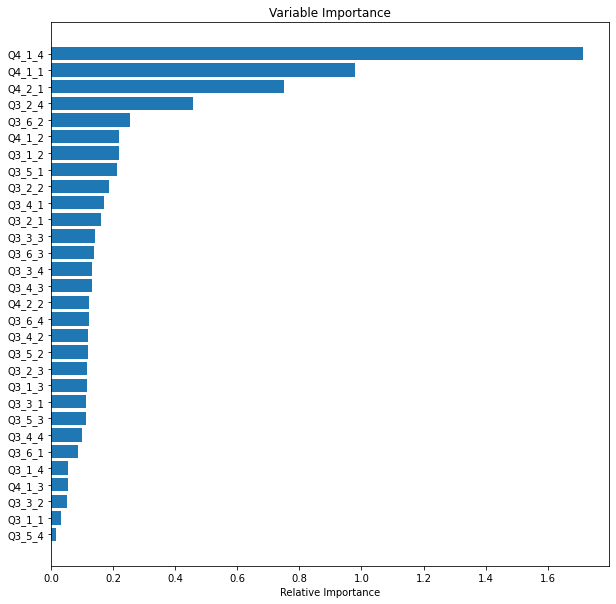

In [35]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [36]:
estimator = clf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = ['0','1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import run
run(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [49]:
def select_features(text,features,select_all=False):
    
    for col in df_dum.columns:
        if select_all:
            features.append(col)
        elif text in col:
            features.append(col)
    return(features)

In [ ]:
# select features
for 


# split X and y

# train and test model

# graph feature importance